# Smart Store Product Classification System


Building a smart store product classification system using a Convolutional Neural Network (CNN) involves a systematic process from data collection to model deployment, utilizing raw images to automatically classify products. The CNN architecture is ideal for this as it automatically extracts features from visual data, requiring minimal manual preprocessing. 

Import necessary libraries

In [ ]:
# Import necessary Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Import splitfolders library for folder data spliting

In [ ]:
import splitfolders
import os

Import tensorflow Libraries and functions

In [5]:
# Importing tensorflow

import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator


1.	Data Collection and Preparation

 Gather Images: Collect a diverse dataset of product images from a retail environment, ideally from multiple angles and under different lighting conditions to make the model robust. Public datasets like  the Retail Products Classification on Kaggle can be used for initial development.

Used total 9000 different images with 18 different categories

one foler inside that older 18 category subfolders in sufolder category images are stored

18 Classes or Categories are

cake, candy, cereal, chips, chocolate, coffee, fish, honey, jam, milk, oil, pasta, rice, soda, sugar, tea, vinegar, water

Split dataset in train 80% test 10% and val 10%

In [3]:
#=====================================================================
             # IMPORTANT :- DONT RUN AGAIN

#======================================================================

input_folder = '../Classification_Project/dataset_500'

# Output will be stored in "split_dataset" folder.
splitfolders.ratio(input_folder,
                   output="../Classification_Project/split_dataset_500",
                   seed=42,
                   ratio=(0.8, 0.1, 0.1))  # (train, val, test)

Copying files: 9000 files [00:39, 230.03 files/s]


Set the train, test, val directory path

In [8]:
# Set the path train,test,val folder path.

train_path = '../Classification_Project/split_dataset_500/train'
test_path = '../Classification_Project/split_dataset_500/test'
val_path = '../Classification_Project/split_dataset_500/val'


Set Hyperparameter

In [9]:
# Image resizing
img_size = (224, 224)
batch_size = 32

Create Augmentation

In [6]:
# APPLY AUGMENTATION

#Create datagen for train
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.8,1.2],
    fill_mode='nearest')


#Create datagen for test
test_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.8,1.2],
    fill_mode='nearest')

#Create datagen for val
val_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.8,1.2],
    fill_mode='nearest')

In [7]:
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical')


Found 7200 images belonging to 18 classes.


In [8]:
test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False)

Found 900 images belonging to 18 classes.


In [9]:
val_generator = val_datagen.flow_from_directory(
    val_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True )

Found 900 images belonging to 18 classes.


Extract the classes

In [ ]:
# Extract the Classes

class_labels = train_generator.class_indices
print("Classes ",class_labels)
num_classes =len(class_labels)

Classes  {'cake': 0, 'candy': 1, 'cereal': 2, 'chips': 3, 'chocolate': 4, 'coffee': 5, 'fish': 6, 'honey': 7, 'jam': 8, 'milk': 9, 'oil': 10, 'pasta': 11, 'rice': 12, 'soda': 13, 'sugar': 14, 'tea': 15, 'vinegar': 16, 'water': 17}


## Build CNN Model

In [11]:
model = models.Sequential([

    layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(*img_size, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(256, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2,2),

    layers.GlobalAveragePooling2D(),

    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),

    layers.Dense(num_classes, activation='softmax')
])


d:\Python Programs\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Compile the model

In [13]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 224, 224, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 28, 28, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 256)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 18)             │         4,626 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 460,754 (1.76 MB)

 Trainable params: 459,794 (1.75 MB)

 Non-trainable params: 960 (3.75 KB)

Create callback and Early stopping

In [14]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint

callbacks = [
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6),
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ModelCheckpoint('Classification_test4_Best_Weight.keras', save_best_only=True)
]


Train the Model

In [15]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20,
    callbacks=callbacks )


Epoch 1/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 695s 3s/step - accuracy: 0.2040 - loss: 2.5594 - val_accuracy: 0.0556 - val_loss: 5.0415 - learning_rate: 0.0010
Epoch 2/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 698s 3s/step - accuracy: 0.3324 - loss: 2.1022 - val_accuracy: 0.1067 - val_loss: 3.8894 - learning_rate: 0.0010
Epoch 3/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 709s 3s/step - accuracy: 0.4206 - loss: 1.8072 - val_accuracy: 0.2900 - val_loss: 2.3675 - learning_rate: 0.0010
Epoch 4/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 730s 3s/step - accuracy: 0.5088 - loss: 1.5519 - val_accuracy: 0.4444 - val_loss: 1.7920 - learning_rate: 0.0010
Epoch 5/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 827s 4s/step - accuracy: 0.5708 - loss: 1.3348 - val_accuracy: 0.6211 - val_loss: 1.2120 - learning_rate: 0.0010
Epoch 6/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 827s 4s/step - accuracy: 0.6413 - loss: 1.1319 - val_accuracy: 0.5622 - val_loss: 1.3520 - learning_rate: 0.0010
Epoch 7/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 855s 4s/step - accuracy: 0.6907 - loss: 0.

Save the Model

In [16]:
# Save entire model (architecture + weights + optimizer state)
model.save("Classification_model_test4.h5")
model.save('Classification_model_test4.keras')

Print Training and Validation Accuracy

In [36]:
# Print accuracy and validation accuracy values
print("Training Accuracy:", history.history['accuracy'])
print("Validation Accuracy:", history.history['val_accuracy'])


Training Accuracy: [0.20402777194976807, 0.332361102104187, 0.42055556178092957, 0.5087500214576721, 0.5708333253860474, 0.6412500143051147, 0.6906944513320923, 0.7436110973358154, 0.7819444537162781, 0.8276388645172119, 0.8556944727897644, 0.8663889169692993, 0.8856944441795349, 0.9113888740539551, 0.914722204208374, 0.9270833134651184, 0.9327777624130249, 0.9302777647972107, 0.9458333253860474, 0.9501388669013977]
Validation Accuracy: [0.0555555559694767, 0.1066666692495346, 0.28999999165534973, 0.4444444477558136, 0.6211110949516296, 0.5622222423553467, 0.5166666507720947, 0.7244444489479065, 0.6399999856948853, 0.7911111116409302, 0.7900000214576721, 0.6966666579246521, 0.8766666650772095, 0.8533333539962769, 0.8433333039283752, 0.897777795791626, 0.898888885974884, 0.8888888955116272, 0.9355555772781372, 0.8922222256660461]


Plot train Accuracy Vs Validation Accuracy

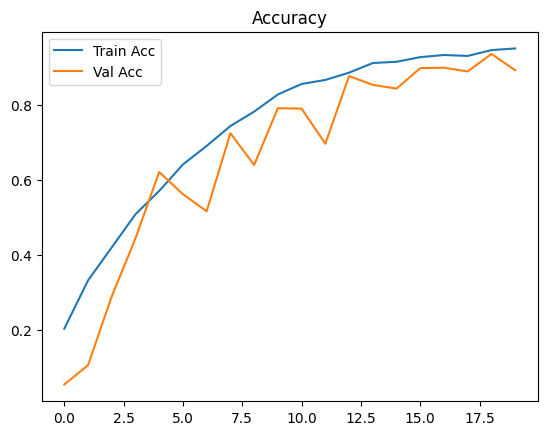

In [17]:
# Plot the accuracy
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title("Accuracy")
plt.show()

Plot train Loss Vs Validation Loss

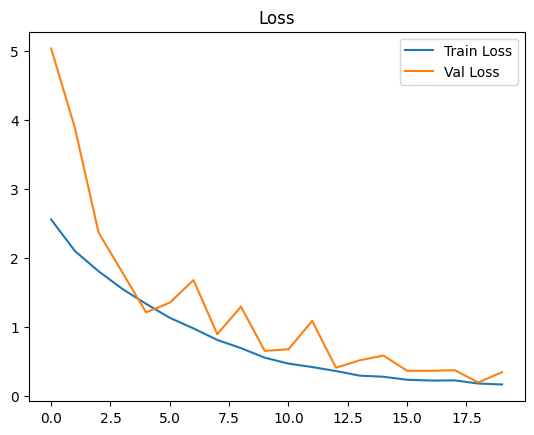

In [20]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title("Loss")
plt.show()

# Metrics

Print Classification Report

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

y_pred = np.argmax(model.predict(test_generator), axis=1)
y_true = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_labels))


29/29 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step
Classification Report:
              precision    recall  f1-score   support

        cake       0.96      0.96      0.96        50
       candy       0.92      0.92      0.92        50
      cereal       0.91      0.98      0.94        50
       chips       0.98      0.94      0.96        50
   chocolate       0.90      0.94      0.92        50
      coffee       0.98      0.84      0.90        50
        fish       0.96      0.98      0.97        50
       honey       0.94      0.94      0.94        50
         jam       1.00      0.94      0.97        50
        milk       1.00      0.92      0.96        50
         oil       0.94      0.68      0.79        50
       pasta       1.00      0.90      0.95        50
        rice       0.84      0.94      0.89        50
        soda       1.00      0.92      0.96        50
       sugar       0.96      0.98      0.97        50
         tea       1.00      0.94      0.97        50
     vinegar       

Print Confusion Matrix

In [27]:
print("Confusion Matrix:")
print(confusion_matrix(y_true, y_pred))

Confusion Matrix:
[[48  0  1  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1 46  0  0  1  1  0  0  0  0  0  0  0  0  0  0  1  0]
 [ 0  0 49  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0]
 [ 0  0  1 47  2  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  1  0 47  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  1  0  0 42  1  0  0  0  0  0  3  0  0  0  2  0]
 [ 0  0  0  0  0  0 49  0  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  0 47  0  0  0  0  0  0  0  0  1  1]
 [ 0  0  0  0  0  0  0  2 47  0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  0 46  0  0  1  0  1  0  2  0]
 [ 0  0  0  0  0  0  0  0  0  0 34  0  0  0  0  0 16  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 45  4  0  0  0  1  0]
 [ 0  0  1  0  1  0  0  0  0  0  0  0 47  0  1  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  1  0  1 46  0  0  2  0]
 [ 0  1  0  0  0  0  0  0  0  0  0  0  0  0 49  0  0  0]
 [ 0  2  0  0  0  0  0  1  0  0  0  0  0  0  0 47  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 50  0]
 [ 0  0  0  0

Plot Confusion Matrix

In [ ]:
#Confusion Matrix  for CNN Model
cm_cnn = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(9,7))
sns.heatmap(cm_cnn, annot=True, fmt="d", cmap="Greens", xticklabels=class_labels, yticklabels=class_labels)
plt.title("Confusion Matrix CNN Classification")
plt.xlabel("Predicted"); plt.ylabel("True")
plt.show()

In [35]:
y_scores = model.predict(test_generator)
print(y_scores)

29/29 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step
[[9.9997008e-01 2.5523388e-08 2.8972987e-05 ... 2.6094182e-07
  7.9043861e-15 7.6212261e-16]
 [9.5974198e-03 1.5810271e-03 7.5679474e-02 ... 1.3060335e-03
  6.0190294e-02 5.7252710e-06]
 [9.7148770e-01 1.2695908e-05 2.8425721e-02 ... 2.2280423e-05
  2.1792788e-11 7.4793307e-13]
 ...
 [9.3042427e-09 3.4395562e-04 1.5840348e-07 ... 9.2497796e-09
  2.6617818e-06 9.9949908e-01]
 [9.9510344e-06 2.5837726e-04 8.9909912e-07 ... 1.4092538e-07
  1.7337649e-06 9.9893302e-01]
 [5.4097886e-04 5.2512513e-04 6.2688428e-05 ... 9.6210752e-06
  9.8792429e-04 8.9787710e-01]]


Load image for prediction

In [30]:
from tensorflow.keras.preprocessing import image

# Load and preprocess a test image
img_path = "../Classification_Project/sampleImage/candy_700.jpg"
img = image.load_img(img_path, target_size=(244, 244))  
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0

Image Class Prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
Predicted label: candy
Prediction confidence: 0.48501056


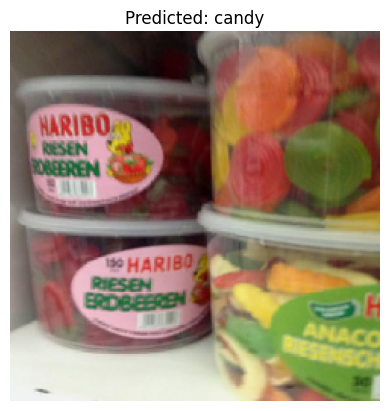

In [31]:
# Make prediction
predictions = model.predict(img_array)

# If model output is probabilities for each class
predicted_class_index = np.argmax(predictions)

# Map index to class label
class_labels = ['cake', 'candy', 'cereal', 'chips', 'chocolate', 'coffee', 'fish', 'honey', 'jam', 'milk', 'oil', 'pasta', 'rice', 'soda', 'sugar', 'tea', 'vinegar', 'water']

predicted_label = class_labels[predicted_class_index]
print("Predicted label:", predicted_label)
print("Prediction confidence:", predictions[0][predicted_class_index])

plt.imshow(img_array[0])
plt.title(f"Predicted: {predicted_label}")
plt.axis("off")
plt.show()

np.save("predictions_Classification_test4.npy", predictions)